In [6]:
# importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(
    skill_list) if pd.notna(skill_list) else skill_list)

In [7]:
df= df[df['job_title_short']== 'Data Analyst']

In [22]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count= ('job_skills', 'count'),# aggregation method 'count' to be done on 'job_skills' method and the output is stored in the column with name 'skill_count'
    median_salary= ('salary_year_avg','median')
)
skill_stats = skill_stats.sort_values(by= 'skill_count', ascending= False).head(10)

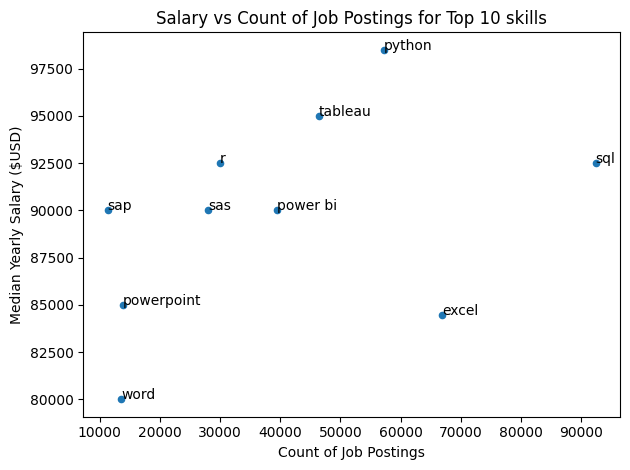

In [23]:
skill_stats.plot(kind= 'scatter', x= 'skill_count', y='median_salary')

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs Count of Job Postings for Top 10 skills')
plt.tight_layout()

for i,txt in enumerate(skill_stats.index):
    plt.text( skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()